In [ ]:
#1. Importar las librerias de NumPy, Pandas y Matplotlib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#2. Importar mi fichero de datos
print("Cargando el archivo workouts.csv...")
#3. Genera un dataframe con los datos incluidos en el fichero
crossfit_df = pd.read_csv('workouts.csv')
print("Fichero cargado correctamente.")
print(crossfit_df)

Cargando el archivo workouts.csv...
Fichero cargado correctamente.
           date                                      title  \
0    10/30/2022                                   Bike Erg   
1    11/01/2022  Pebbles Flintstone (Open & QuarterFinals)   
2    11/03/2022                                   Bike Erg   
3    11/07/2022                                   Bike Erg   
4    11/08/2022              Row: Anaerobic Power Workouts   
..          ...                                        ...   
787  04/18/2025                 Fleetwood Mac (Open 45-54)   
788  04/20/2025                             Reading Review   
789  04/20/2025                         Reading: Psalm 100   
790  04/22/2025  Mayhem Gymnastics [MG Cycle 25-03] Week 5   
791  04/22/2025               Royal Tenenbaum (Open 45-54)   

                                           description  best_result_raw  \
0    2 Sets 3 Min at RPE6.5, 1 Min at Easy5 Min at ...          15740.0   
1    Masters 35-4442-30-18Deadlift (15

In [ ]:
# Organiza la información dentro de Dataframe de la forma que mejor se adecue a la
# problemática que se desea analizar, modifica el tipo de variable en caso de ser necesario.

#revisar el tipo de datos
crossfit_df.dtypes

,0
date,object
title,object
description,object
best_result_raw,float64
best_result_display,object
score_type,object
barbell_lift,object
set_details,object
notes,object
rx_or_scaled,object


In [ ]:
#Valores NO NULOS de cada característica o columna
crossfit_df.count()

,0
date,792
title,792
description,792
best_result_raw,792
best_result_display,772
score_type,653
barbell_lift,346
set_details,792
notes,143
rx_or_scaled,792


In [ ]:
#Determinar los valores faltantes
crossfit_df.isnull().sum()

,0
date,0
title,0
description,0
best_result_raw,0
best_result_display,20
score_type,139
barbell_lift,446
set_details,0
notes,649
rx_or_scaled,0


In [ ]:
# Genera estadísticas descriptivas excluyendo los datos NaN
crossfit_df.describe()

,best_result_raw
count,792.000000
mean,362.999580
std,1516.510497
min,0.000000
25%,1.000000
50%,105.000000
75%,185.000000
max,19870.000000


In [ ]:
# --- Organización y Limpieza del DataFrame ---
print("\n--- Limpieza y Organización de Datos ---")

# Convertir la columna 'date' a un formato de fecha real (datetime)
crossfit_df['date'] = pd.to_datetime(crossfit_df['date'])
crossfit_df.head(10)


--- Limpieza y Organización de Datos ---


,date,title,description,best_result_raw,best_result_display,score_type,barbell_lift,set_details,notes,rx_or_scaled,pr
0,2022-10-30,Bike Erg,"2 Sets 3 Min at RPE6.5, 1 Min at Easy5 Min at ...",15740.0,15740,Meters,NaN,"[{""meters"":15740}]",6:07 time 5 km Test98 RPM,RX,NaN
1,2022-11-01,Pebbles Flintstone (Open & QuarterFinals),Masters 35-4442-30-18Deadlift (155/105)Box jum...,602.0,10:02,NaN,NaN,"[{""secs"":2,""mins"":10}]",Masters 45-50135 lbs,RX,NaN
2,2022-11-03,Bike Erg,5 Min at RPE6.5 -Rest 1 Min- 3x (75 Sec at RPE...,18760.0,18760,Meters,NaN,"[{""meters"":18760}]",263 kcal37 minutes,RX,NaN
3,2022-11-07,Bike Erg,Bike Erg 5k at max effort,428.0,07:08,NaN,NaN,"[{""secs"":8,""mins"":7}]",80 RPM,RX,NaN
4,2022-11-08,Row: Anaerobic Power Workouts,5 Sets 200m at RPE8 100m RPE3100m at RPE10 *Re...,1143.0,19:03,NaN,NaN,"[{""secs"":3,""mins"":19}]",32 al RPE812 al RPE340 al RPE10level 7,RX,NaN
5,2022-12-05,1 1/4 Front Squat 3-3-3-3-3,3 1 ¼ Front Squats @ 65% 1 RM Front Squat3 1 ¼...,115.0,115,Load,Clean Pull + Hang Power Clean to Parallel + Fl...,"[{""success"":true,""load"":75},{""success"":true,""l...",NaN,SCALED,NaN
6,2022-12-05,2 Position Snatch (Above Knee + Floor) 2-2-2-2-2,2 Position Snatch @ 60% 1 RM Snatch2 Position ...,95.0,95,Load,2 Position Snatch (Above Knee + Floor),"[{""success"":true,""load"":65},{""success"":true,""l...",NaN,SCALED,NaN
7,2022-12-05,Hunsucker & Malone (Open & QuarterFinals),Masters 35-445 rounds24 Deadlifts (95/65)18 Ha...,780.0,13:00,NaN,NaN,"[{""secs"":0,""mins"":13}]",3 rounds + 32 reps,RX,NaN
8,2022-12-05,Snatch Push Press + Pause Overhead Squat + Pau...,3 Snatch Push Press + 1 Pause OHS + 1 Pause Sn...,95.0,95,Load,Snatch Push Press + Pause Overhead Squat + Pau...,"[{""success"":true,""load"":45},{""success"":true,""l...",NaN,SCALED,NaN
9,2022-12-07,Jake LockHURT (Open & QuarterFinals),"* Repeat from September 18, 2020 Masters 35-44...",1264.0,21:04,NaN,NaN,"[{""secs"":4,""mins"":21}]",WB 16 lbRing dips,SCALED,NaN


In [ ]:
# Seleccionar solo las columnas más relevantes para este análisis inicial
# Basado en la Fase 1, estas columnas son las más importantes
columnas_relevantes = ['date', 'title', 'score_type', 'best_result_display', 'rx_or_scaled']
crossfit_df_limpio = crossfit_df[columnas_relevantes].copy()
crossfit_df_limpio.head(10)


,date,title,score_type,best_result_display,rx_or_scaled
0,2022-10-30,Bike Erg,Meters,15740,RX
1,2022-11-01,Pebbles Flintstone (Open & QuarterFinals),NaN,10:02,RX
2,2022-11-03,Bike Erg,Meters,18760,RX
3,2022-11-07,Bike Erg,NaN,07:08,RX
4,2022-11-08,Row: Anaerobic Power Workouts,NaN,19:03,RX
5,2022-12-05,1 1/4 Front Squat 3-3-3-3-3,Load,115,SCALED
6,2022-12-05,2 Position Snatch (Above Knee + Floor) 2-2-2-2-2,Load,95,SCALED
7,2022-12-05,Hunsucker & Malone (Open & QuarterFinals),NaN,13:00,RX
8,2022-12-05,Snatch Push Press + Pause Overhead Squat + Pau...,Load,95,SCALED
9,2022-12-07,Jake LockHURT (Open & QuarterFinals),NaN,21:04,SCALED


In [ ]:
# Eliminar filas donde no hay un resultado registrado ('best_result_display' es nulo)
crossfit_df_limpio.dropna(subset=['best_result_display'], inplace=True)

# Reemplazar los valores NaN en 'score_type' por 'For Time'
crossfit_df_limpio['score_type'].fillna('For Time', inplace=True)

print("Tipos de datos después de la limpieza inicial:")
print(crossfit_df_limpio.info())

Tipos de datos después de la limpieza inicial:
<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 0 to 791
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 772 non-null    datetime64[ns]
 1   title                772 non-null    object        
 2   score_type           772 non-null    object        
 3   best_result_display  772 non-null    object        
 4   rx_or_scaled         772 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 36.2+ KB
None


In [ ]:
crossfit_df_limpio.isnull().sum()

,0
date,0
title,0
score_type,0
best_result_display,0
rx_or_scaled,0


In [ ]:
crossfit_df_limpio.head(10)

,date,title,score_type,best_result_display,rx_or_scaled
0,2022-10-30,Bike Erg,Meters,15740,RX
1,2022-11-01,Pebbles Flintstone (Open & QuarterFinals),For Time,10:02,RX
2,2022-11-03,Bike Erg,Meters,18760,RX
3,2022-11-07,Bike Erg,For Time,07:08,RX
4,2022-11-08,Row: Anaerobic Power Workouts,For Time,19:03,RX
5,2022-12-05,1 1/4 Front Squat 3-3-3-3-3,Load,115,SCALED
6,2022-12-05,2 Position Snatch (Above Knee + Floor) 2-2-2-2-2,Load,95,SCALED
7,2022-12-05,Hunsucker & Malone (Open & QuarterFinals),For Time,13:00,RX
8,2022-12-05,Snatch Push Press + Pause Overhead Squat + Pau...,Load,95,SCALED
9,2022-12-07,Jake LockHURT (Open & QuarterFinals),For Time,21:04,SCALED


In [ ]:
# --- Aplicación de una Función Matemática: Convertir Tiempos a Segundos ---
# El objetivo es analizar entrenamientos medidos por tiempo ('For Time').
# La columna 'best_result_display' contiene texto como "10:02". Necesitamos convertirlo a un número (segundos) para poder analizarlo.
def convertir_a_segundos(tiempo):
    if isinstance(tiempo, str):
        partes = tiempo.split(':')
        if len(partes) == 2: #MM:SS
            try:
                minutos = int(partes[0])
                segundos = int(partes[1])
                return minutos * 60 + segundos
            except ValueError:
                return None
        elif len(partes) == 3: #HH:MM:SS
             try:
                horas = int(partes[0])
                minutos = int(partes[1])
                segundos = int(partes[2])
                return horas * 3600 + minutos * 60 + segundos
             except ValueError:
                return None
        else:
            return None
    else:
        return None

# Filtrar para quedarnos solo con los WODs cuyo resultado es por tiempo
crossfit_df_tiempo = crossfit_df_limpio[crossfit_df_limpio['score_type'] == 'For Time'].copy()

# Aplicar la función a la columna 'best_result_display' para crear una nueva columna 'resultado_en_segundos'
print("\nAplicando función para convertir tiempos a segundos...")
crossfit_df_tiempo['resultado_en_segundos'] = crossfit_df_tiempo['best_result_display'].apply(convertir_a_segundos)

# Convertir la nueva columna a un tipo numérico, coercing errors
crossfit_df_tiempo['resultado_en_segundos'] = pd.to_numeric(crossfit_df_tiempo['resultado_en_segundos'], errors='coerce')

print("Conversión completada.")
print("Tipos de datos después de la conversión de tiempos:")
print(crossfit_df_tiempo.head(10))


Aplicando función para convertir tiempos a segundos...
Conversión completada.
Tipos de datos después de la conversión de tiempos:
         date                                              title score_type  \
1  2022-11-01          Pebbles Flintstone (Open & QuarterFinals)   For Time   
3  2022-11-07                                           Bike Erg   For Time   
4  2022-11-08                      Row: Anaerobic Power Workouts   For Time   
7  2022-12-05         Hunsucker & Malone  (Open & QuarterFinals)   For Time   
9  2022-12-07              Jake LockHURT  (Open & QuarterFinals)   For Time   
11 2022-12-12                  Polar Bear (Open & QuarterFinals)   For Time   
24 2022-12-26      Times Square Ball Drop (Open & QuarterFinals)   For Time   
31 2022-12-27  Black Eyed Peas & Collard Greens  (Open & Quar...   For Time   
35 2023-01-02               Elsa and Anna (Open & QuarterFinals)   For Time   
38 2023-01-03     Olaf (Open, QuarterFinals, SemiFinals & Games)   For Time   



--- Análisis y Visualización de Muestra Metros: Resistencia (por Distancia) ---

Datos encontrados para entrenamientos de Bike Erg (por distancia):
         date                       title  resultado_en_metros
0  2022-10-30                    Bike Erg                15740
2  2022-11-03                    Bike Erg                18760
10 2022-12-11  BikeErg: Lactate Threshold                19870
42 2023-01-08  BikeErg: Lactate Threshold                15330
64 2023-01-26  BikeErg: Lactate Threshold                16600

Generando gráfico de Resistencia (por Distancia)...


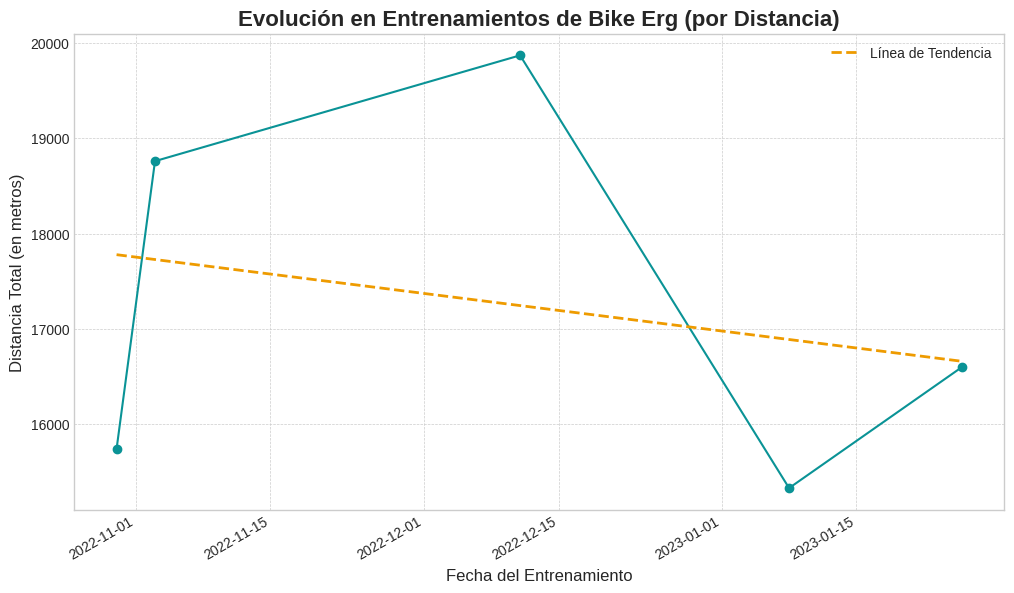

In [ ]:
# --- ANÁLISIS MUESTRA METROS: ENTRENAMIENTO DE RESISTENCIA (DISTANCIA) ---
import matplotlib.dates as mdates
print("\n--- Análisis y Visualización de Muestra Metros: Resistencia (por Distancia) ---")
df_metros = crossfit_df_limpio[crossfit_df_limpio['score_type'] == 'Meters'].copy()
df_metros['resultado_en_metros'] = pd.to_numeric(df_metros['best_result_display'], errors='coerce')
df_metros.dropna(subset=['resultado_en_metros'], inplace=True)

# Filtrar por entrenamientos que contengan "Bike" en el título para ser consistentes
df_muestra_metros = df_metros[df_metros['title'].str.contains("Bike", na=False)].copy()
df_muestra_metros = df_muestra_metros.sort_values(by='date')

if df_muestra_metros.empty:
    print("No se encontraron datos para entrenamientos de Bike Erg medidos en metros.")
else:
    print(f"\nDatos encontrados para entrenamientos de Bike Erg (por distancia):")
    print(df_muestra_metros[['date', 'title', 'resultado_en_metros']].tail()) # Mostrar los últimos para ver los más recientes
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(df_muestra_metros['date'], df_muestra_metros['resultado_en_metros'], marker='o', linestyle='-', color='#0a9396')
    ax.set_title('Evolución en Entrenamientos de Bike Erg (por Distancia)', fontsize=16, weight='bold')
    ax.set_xlabel('Fecha del Entrenamiento', fontsize=12)
    ax.set_ylabel('Distancia Total (en metros)', fontsize=12)
    fig.autofmt_xdate()
    # Para distancia, un valor más alto es mejor
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Añadir una línea de tendencia
    x_fechas_metros = mdates.date2num(df_muestra_metros['date'])
    z_metros = np.polyfit(x_fechas_metros, df_muestra_metros['resultado_en_metros'], 1)
    p_metros = np.poly1d(z_metros)
    ax.plot(x_fechas_metros, p_metros(x_fechas_metros), "r--", color='#ee9b00', linewidth=2, label='Línea de Tendencia')
    ax.legend()

    print("\nGenerando gráfico de Resistencia (por Distancia)...")
    plt.show()